Importing libraries for project

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [2]:
#load data
data=pd.read_csv('customer_train.csv')


In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(1680, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [6]:
#Delete unwanted coloumn
def delete_column(df, column_name):
    if column_name in df.columns:
        del df[column_name]
        return df
    else:
        print(f"Column '{column_name}' not found in DataFrame.")
        return df
# Deleting column 'Unnamed'
data = delete_column(data, 'Unnamed: 0')

data = delete_column(data, 'Unnamed: 0.1')

print(data)

        ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0     5524        1957        S1         Lajang  58138000.0        0   
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
...    ...         ...       ...            ...         ...      ...   
1675  4712        1991        D3    Bertunangan  20193000.0        0   
1676  1170        1975        S1        Menikah  27573000.0        1   
1677  6347        1979       SMA         Lajang  15862000.0        1   
1678  4065        1976        S3        Menikah  49544000.0        1   
1679  8230        1980        S1        Menikah  33228000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58   635000  ...              

In [7]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [9]:
#checking missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 17 null values in Income

In [10]:
# filling the null values with the mean.
data['Income']=data['Income'].fillna(data['Income'].mean())
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,3238.155703,12.027192,2.137345e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2823.250000,1960.000000,3.579075e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5381.000000,1970.000000,5.144550e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8370.750000,1977.000000,6.789750e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [14]:
numeric_columns = data.select_dtypes(include=['number'])


In [15]:
numeric_columns.shape


(1680, 26)

In [16]:
numeric_columns

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138000.0,0,0,58,635000,88000,546000,172000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344000.0,1,1,38,11000,1000,6000,2000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613000.0,0,0,26,426000,49000,127000,111000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646000.0,1,0,26,11000,4000,20000,10000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293000.0,1,0,94,173000,43000,118000,46000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,20193000.0,0,0,18,8000,8000,22000,24000,...,4,0,0,0,0,0,0,3,11,0
1676,1170,1975,27573000.0,1,0,45,50000,15000,110000,39000,...,8,0,0,0,0,0,0,3,11,0
1677,6347,1979,15862000.0,1,0,26,1000,1000,4000,11000,...,8,0,0,0,0,0,0,3,11,0
1678,4065,1976,49544000.0,1,0,0,308000,0,73000,0,...,7,0,0,0,0,0,0,3,11,0


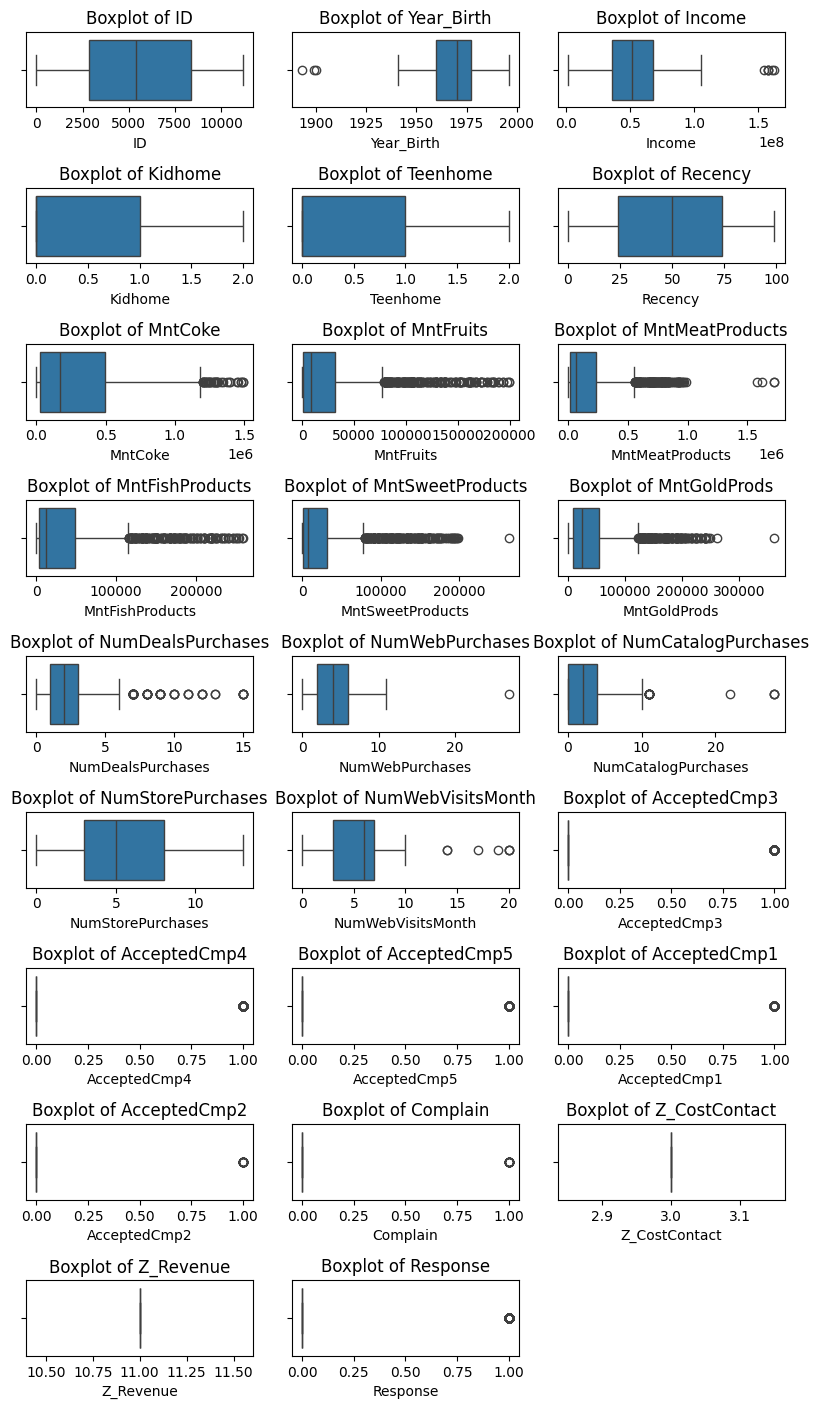

In [17]:
# Visualize numerical features
plt.figure(figsize=(8, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(13, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [18]:
for column in numeric_columns.columns:
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [19]:
# Replace outliers with boundaries
data[column] = np.where(
    data[column] < lower_bound, lower_bound,
    np.where(data[column] > upper_bound, upper_bound, data[column])
)

print("Fixed DataFrame:")

print(data)

Fixed DataFrame:
        ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0     5524        1957        S1         Lajang  58138000.0        0   
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
...    ...         ...       ...            ...         ...      ...   
1675  4712        1991        D3    Bertunangan  20193000.0        0   
1676  1170        1975        S1        Menikah  27573000.0        1   
1677  6347        1979       SMA         Lajang  15862000.0        1   
1678  4065        1976        S3        Menikah  49544000.0        1   
1679  8230        1980        S1        Menikah  33228000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58   635000  

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

sns.pairplot(numeric_columns)

In [21]:
data['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [22]:
data.loc[data['Marital_Status'] == 'Bertunangan', 'Marital_Status'] = 'In a Relationship'
data.loc[data['Marital_Status'] == 'Menikah', 'Marital_Status'] = 'In a Relationship'
data.loc[data['Marital_Status'] == 'Lajang', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Cerai', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Janda', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Duda', 'Marital_Status'] = 'Single'

data['Marital_Status'].value_counts()

Marital_Status
In a Relationship    1088
Single                592
Name: count, dtype: int64

In [23]:
data['CmpAccepted'] = np.where((data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] +
                              data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']) > 0, 1, 0)

#Drop that columns
data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1, inplace=True)

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,CmpAccepted
0,5524,1957,S1,Single,58138000.0,0,0,04-09-2012,58,635000,...,88000,3,8,10,4,7,0,3,11,0
1,2174,1954,S1,Single,46344000.0,1,1,08-03-2014,38,11000,...,6000,2,1,1,2,5,0,3,11,0
2,4141,1965,S1,In a Relationship,71613000.0,0,0,21-08-2013,26,426000,...,42000,1,8,2,10,4,0,3,11,0
3,6182,1984,S1,In a Relationship,26646000.0,1,0,10-02-2014,26,11000,...,5000,2,2,0,4,6,0,3,11,0
4,5324,1981,S3,In a Relationship,58293000.0,1,0,19-01-2014,94,173000,...,15000,5,5,3,6,5,0,3,11,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1680 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

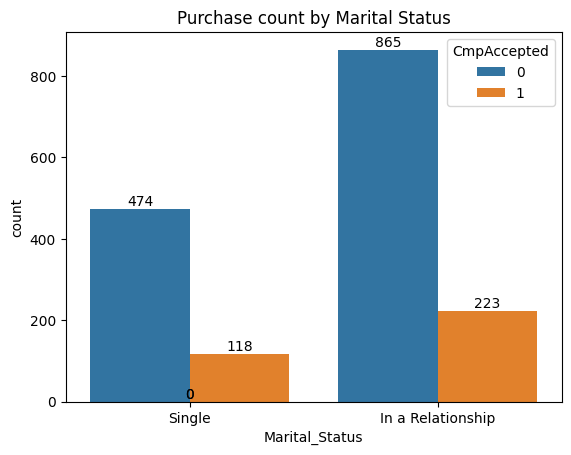

<Figure size 640x480 with 0 Axes>

In [25]:
ax = sns.countplot(x='Marital_Status', hue='CmpAccepted', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Purchase count by Marital Status')
plt.show()
plt.savefig('Purchase count by Marital Status.png')

In [26]:
data['Education'].unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [27]:


label_encoder = LabelEncoder()

# Encode 'Education' column
data['Education'] = label_encoder.fit_transform(data['Education'])
education_labels = label_encoder.classes_

print("Mapping for 'Education':")
for label, encoded_value in enumerate(education_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

print("\n")

# Encode 'Marital_Status' column
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
marital_status_labels = label_encoder.classes_

print("Mapping for 'Marital_Status':")
for label, encoded_value in enumerate(marital_status_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

Mapping for 'Education':
The numerical value 0 corresponds to: D3
The numerical value 1 corresponds to: S1
The numerical value 2 corresponds to: S2
The numerical value 3 corresponds to: S3
The numerical value 4 corresponds to: SMA


Mapping for 'Marital_Status':
The numerical value 0 corresponds to: In a Relationship
The numerical value 1 corresponds to: Single


In [28]:
data_encoded = pd.get_dummies(data, columns=['Education'], drop_first=True)

In [29]:
# Convert 'Dt_Customer' column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
print(data.dtypes)

ID                              int64
Year_Birth                      int64
Education                       int32
Marital_Status                  int32
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
CmpAccepted                     int32
dtype: object


In [30]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,CmpAccepted
0,5524,1957,1,1,58138000.0,0,0,2012-09-04,58,635000,...,88000,3,8,10,4,7,0,3,11,0
1,2174,1954,1,1,46344000.0,1,1,2014-03-08,38,11000,...,6000,2,1,1,2,5,0,3,11,0
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,42000,1,8,2,10,4,0,3,11,0
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,5000,2,2,0,4,6,0,3,11,0
4,5324,1981,3,0,58293000.0,1,0,2014-01-19,94,173000,...,15000,5,5,3,6,5,0,3,11,0


In [31]:
import datetime
Enrollment = data.set_index(data['Dt_Customer']).resample('MS').size()
Enrollment

Dt_Customer
2012-07-01     2
2012-08-01    88
2012-09-01    71
2012-10-01    66
2012-11-01    75
2012-12-01    67
2013-01-01    81
2013-02-01    67
2013-03-01    72
2013-04-01    74
2013-05-01    82
2013-06-01    68
2013-07-01    76
2013-08-01    79
2013-09-01    68
2013-10-01    88
2013-11-01    69
2013-12-01    76
2014-01-01    62
2014-02-01    61
2014-03-01    79
2014-04-01    68
2014-05-01    89
2014-06-01    52
Freq: MS, dtype: int64

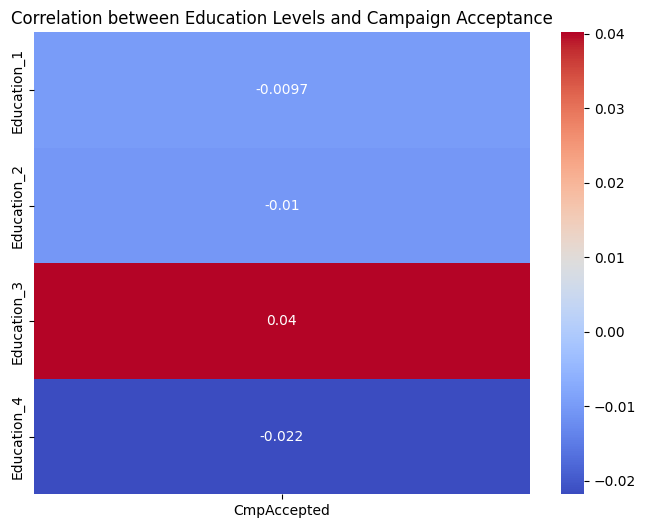

In [32]:
data_encoded = pd.get_dummies(data, columns=['Education'], drop_first=True)
correlation = data_encoded.corr()

education_correlation = correlation[['CmpAccepted']].loc[data_encoded.columns.str.contains('Education')]
plt.figure(figsize=(8, 6))
sns.heatmap(education_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Education Levels and Campaign Acceptance')
plt.show()

In [33]:
# Calculate total purchases for each mode
total_purchases = {'Web Purchases': data['NumWebPurchases'].sum(),'Catalog Purchases': data['NumCatalogPurchases'].sum(),'Store Purchases': data['NumStorePurchases'].sum(),'Web Visits': data['NumWebVisitsMonth'].sum()}

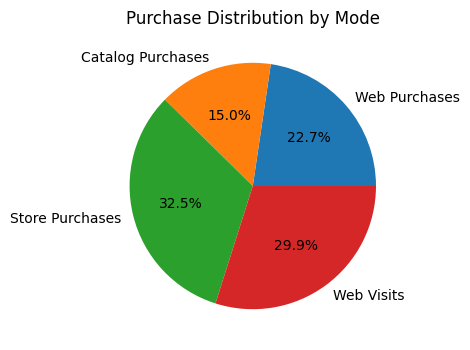

In [34]:
plt.figure(figsize=(4, 4))
plt.pie(total_purchases.values(), labels=total_purchases.keys(), autopct='%1.1f%%')
plt.title('Purchase Distribution by Mode')
plt.show()

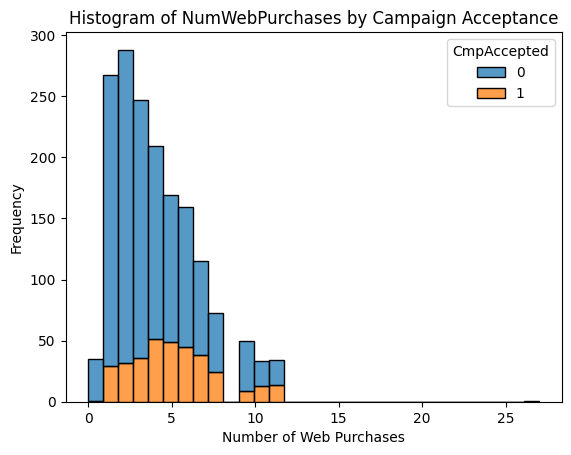

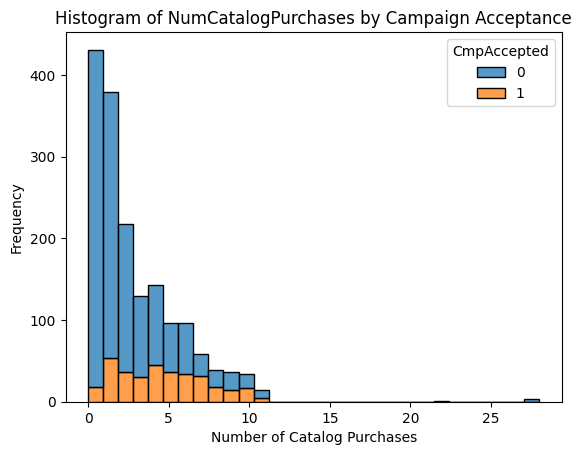

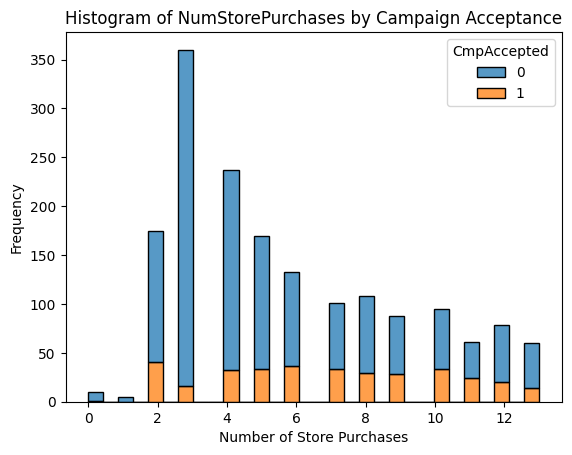

In [35]:
# Histogram for NumWebPurchases
sns.histplot(data=data, x='NumWebPurchases', hue='CmpAccepted', multiple='stack', bins=30)
plt.title('Histogram of NumWebPurchases by Campaign Acceptance')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Frequency')
plt.show()

# Histogram for NumCatalogPurchases
sns.histplot(data=data, x='NumCatalogPurchases', hue='CmpAccepted', multiple='stack', bins=30)
plt.title('Histogram of NumCatalogPurchases by Campaign Acceptance')
plt.xlabel('Number of Catalog Purchases')
plt.ylabel('Frequency')
plt.show()

# Histogram for NumStorePurchases
sns.histplot(data=data, x='NumStorePurchases', hue='CmpAccepted', multiple='stack', bins=30)
plt.title('Histogram of NumStorePurchases by Campaign Acceptance')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Frequency')
plt.show()

In [36]:
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)


In [37]:
data['Total_Spending'] = data['MntCoke']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
#We want to combine the columns listed above for computational convenienc. And drop some colums.
data.drop(['ID', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [38]:
data.drop(['Complain', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

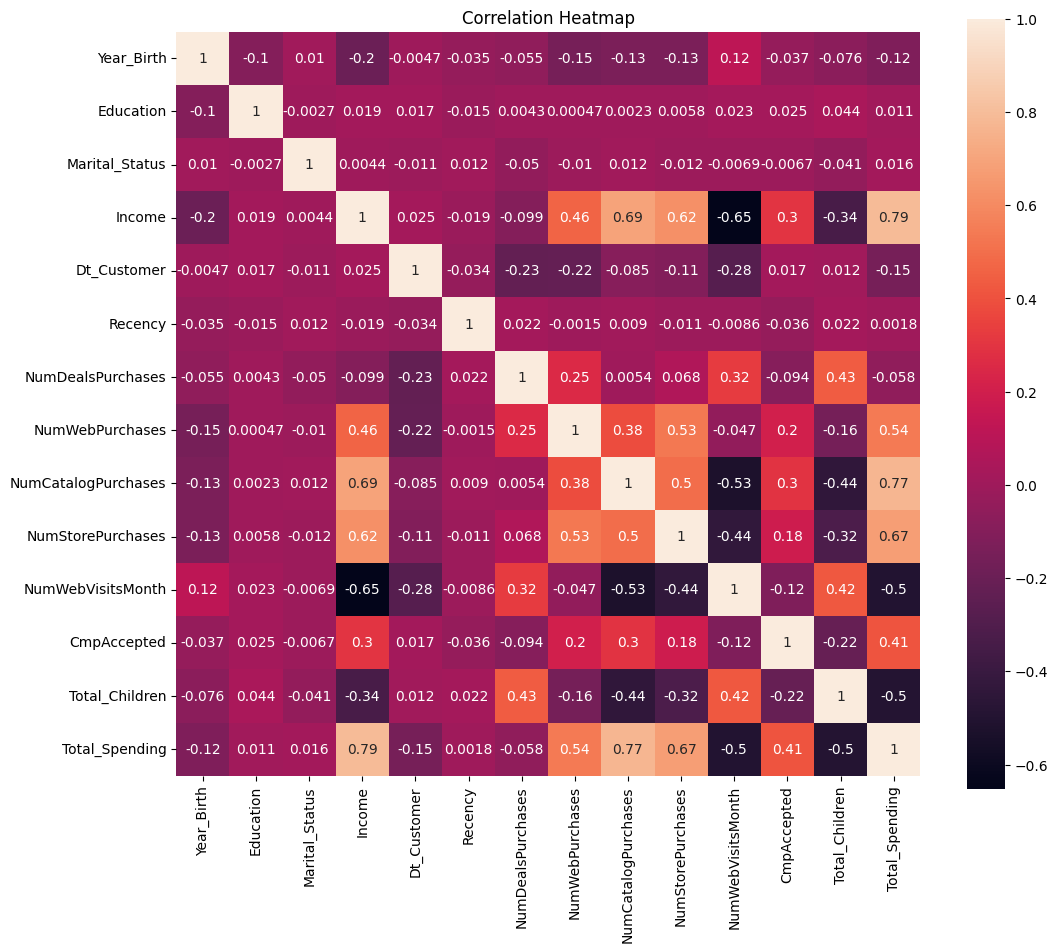

In [39]:
ax = plt.subplots( figsize =( 12 , 10 ) )
foo = sns.heatmap(data.corr(), vmax=1.0, square=True, annot=True)
plt.title('Correlation Heatmap')
plt.savefig('Correlation heatmap.png')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           1680 non-null   int64         
 1   Education            1680 non-null   int32         
 2   Marital_Status       1680 non-null   int32         
 3   Income               1680 non-null   float64       
 4   Dt_Customer          1680 non-null   datetime64[ns]
 5   Recency              1680 non-null   int64         
 6   NumDealsPurchases    1680 non-null   int64         
 7   NumWebPurchases      1680 non-null   int64         
 8   NumCatalogPurchases  1680 non-null   int64         
 9   NumStorePurchases    1680 non-null   int64         
 10  NumWebVisitsMonth    1680 non-null   int64         
 11  CmpAccepted          1680 non-null   int32         
 12  Total_Children       1680 non-null   int64         
 13  Total_Spending       1680 non-nul

In [41]:
#Feature selection and train test split

X = data.drop(columns=['CmpAccepted', 'Dt_Customer']) 
y = data['CmpAccepted']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Train Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [43]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                Feature  Importance
11       Total_Spending    0.275700
3                Income    0.178652
7   NumCatalogPurchases    0.116293
8     NumStorePurchases    0.078704
6       NumWebPurchases    0.068707
0            Year_Birth    0.060115
9     NumWebVisitsMonth    0.056294
10       Total_Children    0.056175
4               Recency    0.051041
5     NumDealsPurchases    0.028625
1             Education    0.017234
2        Marital_Status    0.012459


In [44]:
selector = SelectFromModel(rf, threshold=0.01)  # Select features above the mean importance
selector.fit(X_train, y_train)

# Transform data to keep selected features
X_train_selected = selector.transform(X_train)

X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Total_Children',
       'Total_Spending'],
      dtype='object')


In [45]:
# Feature Scaling
print("\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


Scaling features...


In [46]:
# Create and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
rf_model = rf_classifier.fit(X_train_scaled, y_train)

In [47]:
# Predict the target variable for the test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

In [48]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.86
Precision: 0.85
Recall: 0.86
F1 Score: 0.85


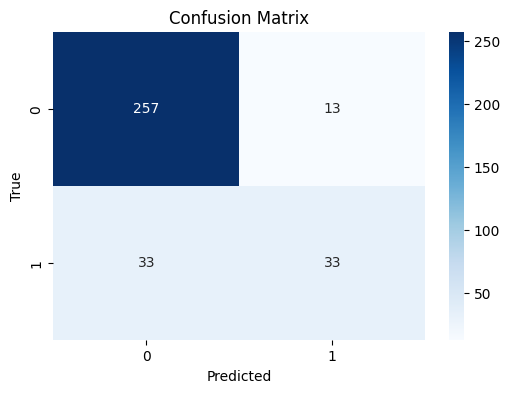

In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# Create a Bagging classifier with KNN as the base estimator
bagging = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=2, weights='distance'),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
)

In [51]:
bagging_model=bagging.fit(X_train_scaled, y_train)

In [52]:
y_pred_bag=bagging_model.predict(X_test_scaled)

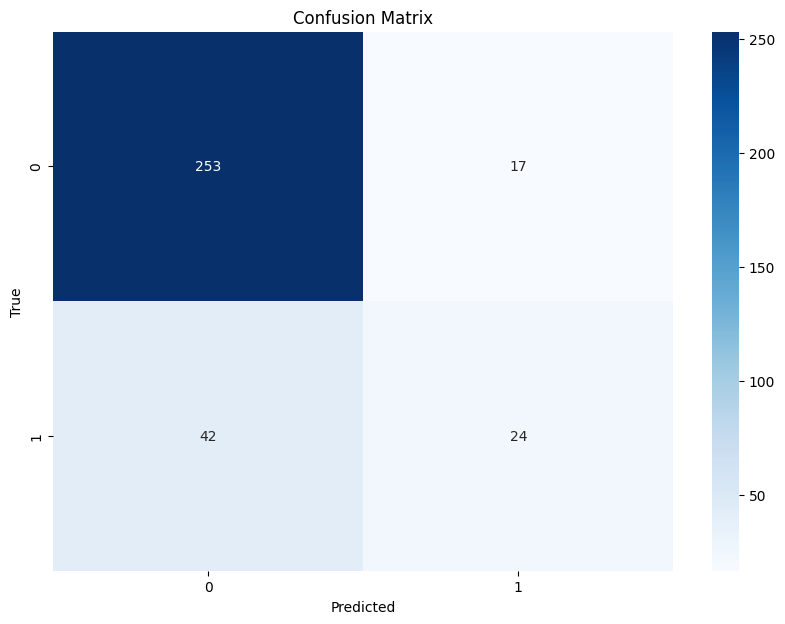

In [53]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_bag)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=bagging.classes_, yticklabels=bagging.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_bag)
precision = precision_score(y_test, y_pred_bag, average='weighted')
recall = recall_score(y_test, y_pred_bag, average='weighted')
f1 = f1_score(y_test, y_pred_bag, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.80
Recall: 0.82
F1 Score: 0.81


In [55]:
logisticregression=LogisticRegression(max_iter=1000)

In [56]:
logistic_model=logisticregression.fit(X_train_scaled, y_train)

In [57]:
y_pred_log=logisticregression.predict(X_test_scaled)

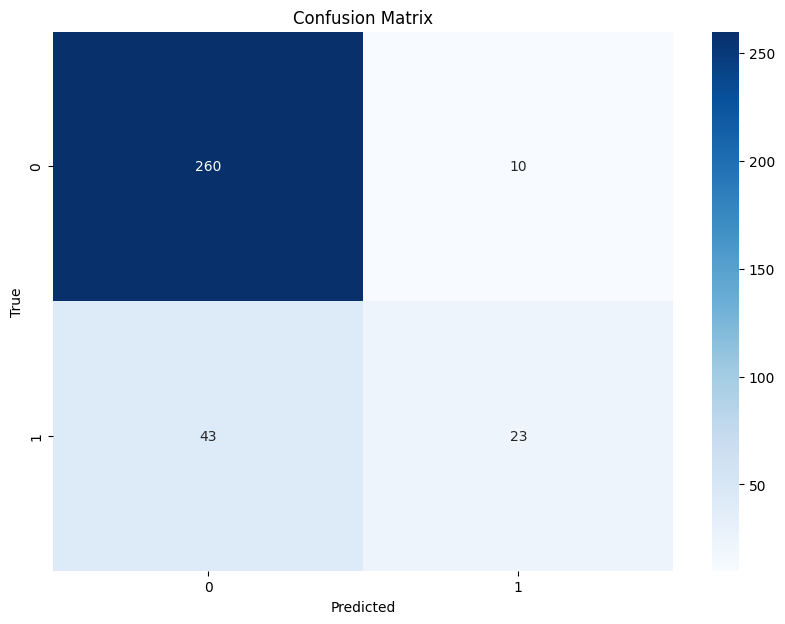

In [58]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=logisticregression.classes_, yticklabels=logisticregression.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='weighted')
recall = recall_score(y_test, y_pred_log, average='weighted')
f1 = f1_score(y_test, y_pred_log, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1 Score: 0.82


In [60]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
     "Bagging Classifier": BaggingClassifier(
    KNeighborsClassifier(n_neighbors=2, weights='distance'),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
)}

In [61]:
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')  # Change scoring as needed
    results[name] = scores.mean()

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [62]:
# Print results
print("Model Performance:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

Model Performance:
Logistic Regression: 0.8222
Random Forest: 0.8363
Bagging Classifier: 0.8169


In [63]:
# Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with accuracy {results[best_model]:.4f}")


Best Model: Random Forest with accuracy 0.8363
